In [1]:
# HIDDEN
from datascience import *
%matplotlib inline 
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [6]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)
jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


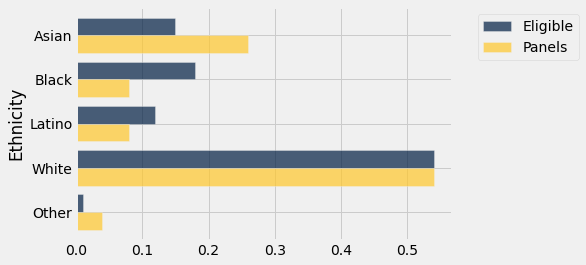

In [7]:
jury.barh('Ethnicity')

In [9]:
jury_with_diffs = jury.with_column('Difference', jury.column('Panels') - jury.column('Eligible'))

In [10]:
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [14]:
jury_with_diffs = jury_with_diffs.with_column('Absolute Difference', np.abs(jury_with_diffs.column('Difference')))

In [15]:
jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Absolute Difference
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.1,0.1
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0,0
Other,0.01,0.04,0.03,0.03


In [16]:
sum(jury_with_diffs.column('Absolute Difference'))

0.28

In [17]:
sum(jury_with_diffs.column('Absolute Difference')) / 2

0.14

In [21]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [23]:
total_variation_distance(jury.column('Panels'), jury.column('Eligible'))

0.14

In [24]:
eligible = jury.column('Eligible')

In [25]:
panels_and_sample = jury.with_column('Random Sample', sample_proportions(1453, eligible))

In [26]:
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian,0.15,0.26,0.152099
Black,0.18,0.08,0.198211
Latino,0.12,0.08,0.119752
White,0.54,0.54,0.520303
Other,0.01,0.04,0.00963524


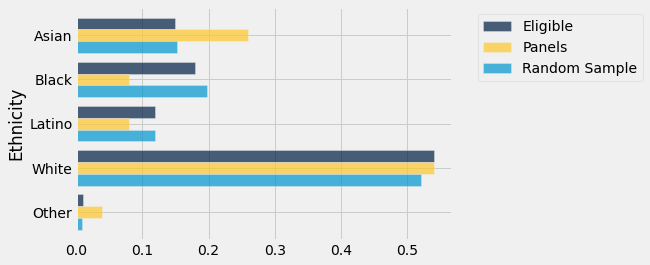

In [28]:
panels_and_sample.barh('Ethnicity')

In [29]:
total_variation_distance(panels_and_sample.column('Random Sample'), eligible)

0.02030970406056437

In [30]:
total_variation_distance(jury.column('Panels'), eligible)

0.14

In [32]:
tvds = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    sample_distribution = sample_proportions(1453, eligible)
    new_tvd = total_variation_distance(sample_distribution, eligible)
    tvds = np.append(tvds, new_tvd)

"It is based on 10,000 number, each of which is a total\n   variation distance. Each total variation distance is computed\n   based on a sample that we dre at random from\n   the eligible population.   \n   It's the distance between that sample distribution and the\n   distribution of the eligible population.   \n   What this histogram show? It's a prediction.\n   It's a prediction based on the model of random selection.   \n   If you select a panel of size 1,453 at random\n   from the eligible population, then the distances\n   between your sample and your underlying distribution\n   looks something like this, mostly in the 0 to 0.05 range.\n   That is what our simulation is predicting."

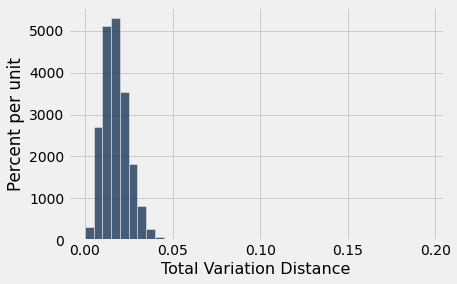

In [42]:
Table().with_column('Total Variation Distance', tvds).hist(bins = np.arange(0, 0.2, 0.005))

'''It is based on 10,000 number, each of which is a total
   variation distance. Each total variation distance is computed
   based on a sample that we dre at random from
   the eligible population.   
   It's the distance between that sample distribution and the
   distribution of the eligible population.   
   What this histogram show? It's a prediction.
   It's a prediction based on the model of random selection.   
   If you select a panel of size 1,453 at random
   from the eligible population, then the distances
   between your sample and your underlying distribution
   looks something like this, mostly in the 0 to 0.05 range.
   That is what our simulation is predicting.'''


In [34]:
total_variation_distance(jury.column('Panels'), eligible)

0.14